In [1]:
#importing necesary packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Acquiring Data

In [2]:
data=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing data...what a relief

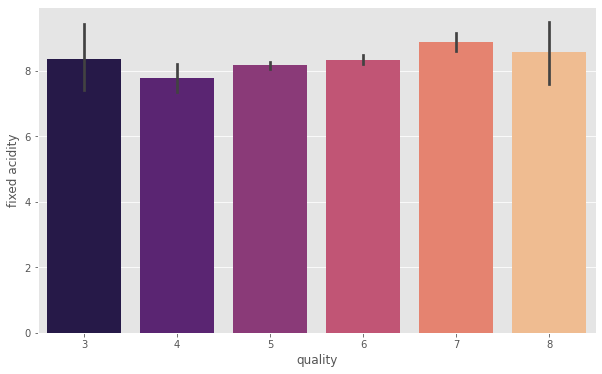

In [5]:
#quality directly does not depend on fixed acity
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=data, palette="magma")

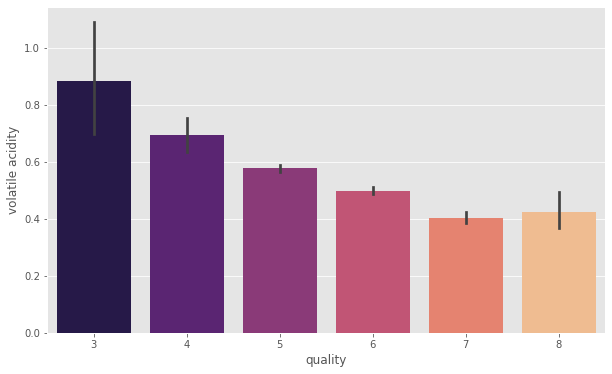

In [6]:
#as quality increases voaltile acidity decreases
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=data, palette="magma")

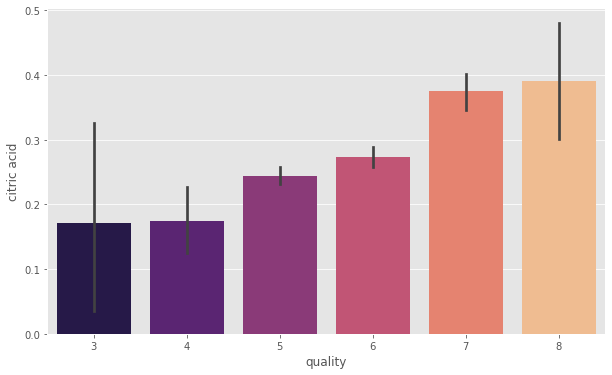

In [7]:
#as quality increases citric acid content increases
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=data, palette="magma")

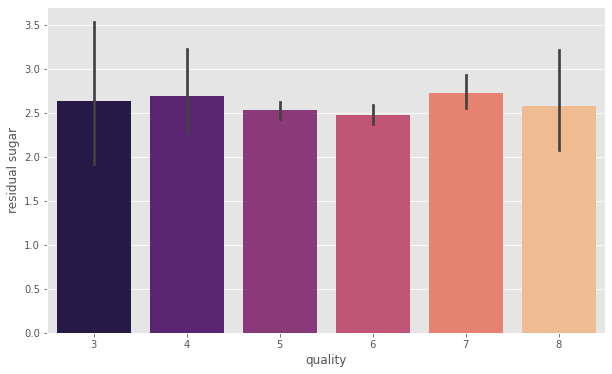

In [8]:
#as quality does not directly depend on residual sugar content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=data, palette="magma")

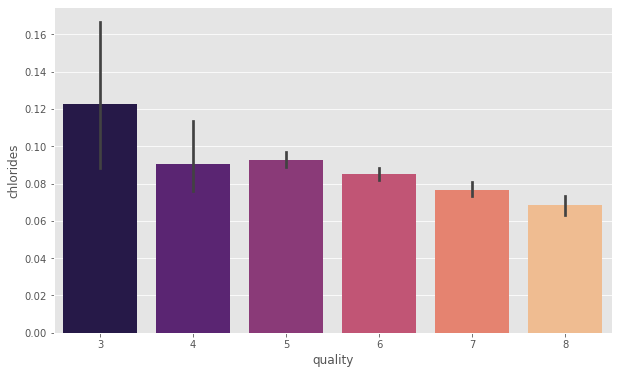

In [9]:
#as quality increases chlorides content decreases
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data=data, palette="magma")

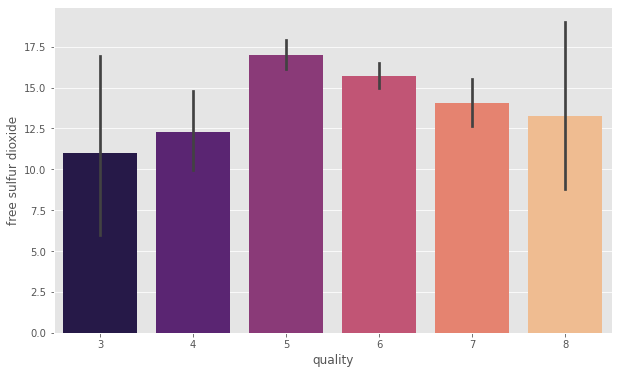

In [10]:
#medium quality red wine have highest free sulfur dioxide
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=data, palette="magma")

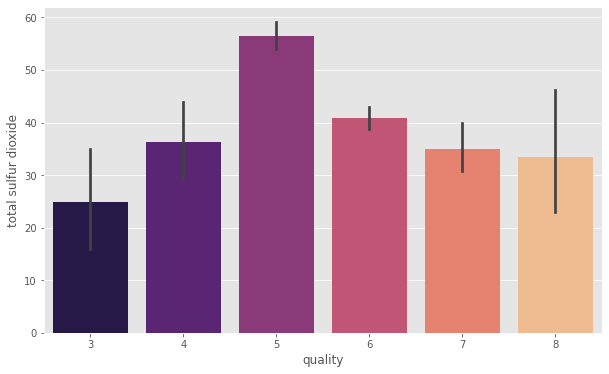

In [11]:
#medium quality red wine have highest total sulfur dioxide
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=data, palette="magma")

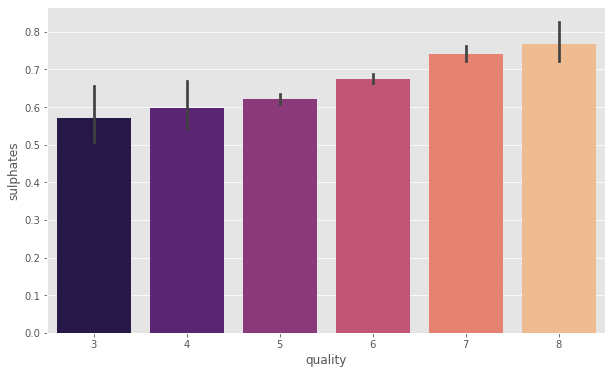

In [12]:
#quality directly depends on sulphates
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=data, palette="magma")

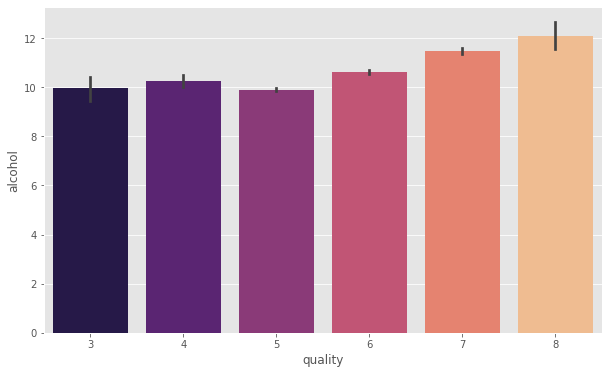

In [13]:
#quality directly depends on alcohol
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=data, palette="magma")

In [14]:
#density and pH is almost similar in all cases hence we avoid it
print("Respectively Maximum and Minimum value of density: ", data['density'].max(), "\t", data['density'].min())
print("Respectively Maximum and Minimum value of pH: ", data['pH'].max(), "\t", data['pH'].min())

Respectively Maximum and Minimum value of density:  1.00369 	 0.99007
Respectively Maximum and Minimum value of pH:  4.01 	 2.74


# Therefore, according to EDA quality is dependent on
* volatile acidity
* citric acid
* chlorides
* free sulphur dieoxide
* total sulphur dieoxide
* sulphates
* alcohol

# Taking 7 to be the threshold for being good, we mark all the bad with 0 and good with 1

In [15]:
#Dividing wine as good and bad by giving the limit for the quality
bins=(2, 6.5, 8)
group_names=['bad', 'good']
data['quality']=pd.cut(data['quality'], bins=bins, labels=group_names)

In [16]:
#changing the good labels to 1 and bad to 0 with a label encoder
enc=LabelEncoder()
data['quality']=enc.fit_transform(data['quality'])

In [17]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [18]:
X=data.drop('quality', axis=1)
y=data['quality']

Applying Scaling, Xi=(Xi-mean)/scale_factor

In [19]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression

In [21]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred_lr)*100

86.45833333333334

In [30]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.30      0.38        67

    accuracy                           0.86       480
   macro avg       0.71      0.63      0.65       480
weighted avg       0.84      0.86      0.85       480



An acuracy of 86% with the normal logistic regresion model

# 2. Random Forest 

In [27]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_rf)*100

88.125

In [28]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       413
           1       0.59      0.49      0.54        67

    accuracy                           0.88       480
   macro avg       0.75      0.72      0.73       480
weighted avg       0.87      0.88      0.88       480



An accuracy of 88% with the random forest classifier

# 3. Decision Tree

In [25]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_dt)*100

87.29166666666667

In [31]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       413
           1       0.53      0.69      0.60        67

    accuracy                           0.87       480
   macro avg       0.74      0.79      0.76       480
weighted avg       0.89      0.87      0.88       480



An accuracy of 87% is obtained from decision tree

# 4. SVM

In [38]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svm=svc.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred_svm)*100

88.33333333333333

In [40]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       413
           1       0.68      0.31      0.43        67

    accuracy                           0.88       480
   macro avg       0.79      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480

